In [1]:
library(readr)
github="https://raw.githubusercontent.com/agronomy4future/raw_data_practice/main/light_spectrum.csv"
df= data.frame(read_csv(url(github), show_col_types=FALSE))
head(df, 5)

,spectrum,relative_intensity
,<dbl>,<dbl>
1,380,0.01574
2,381,0.01582
3,382,0.01523
4,383,0.01463
5,384,0.01401


In [2]:
wavelength= function(wavelengths) {
   # Apply function to each wavelength
           sapply(wavelengths, function(wavelength) {
   # Initialize RGB values
    red= green= blue= 0
   # Determine red and blue values for specific wavelength ranges
    if (wavelength>= 380 & wavelength<440) {
      red=-(wavelength-440)/(440-380)
      blue=1
    } else if (wavelength>=440 & wavelength<490) {
      green=(wavelength-440)/(490-440)
      blue=1
    } else if (wavelength>=490 & wavelength<510) {
      green=1
      blue=-(wavelength-510)/(510-490)
    } else if (wavelength>=510 & wavelength<580) {
      red=(wavelength-510)/(580-510)
      green=1
    } else if (wavelength>=580 & wavelength<645) {
      red=1
      green=-(wavelength-645)/(645-580)
    } else if (wavelength>=645 & wavelength<781) {
      red=1
    }

  # Determine factor for adjusting RGB values
    if (wavelength>=380 & wavelength<420) {
      fac=0.3+0.7*(wavelength-380)/(420-380)
    } else if (wavelength>=420 & wavelength<701) {
      fac=1
    } else if (wavelength>=701 & wavelength<781) {
      fac=0.3+0.7*(780-wavelength)/(780-700)
    } else {
      fac=0
    }

  # Apply RGB values with factor and return color
    do.call(rgb, as.list((c(red, green, blue) * fac) ^ 0.8))
  })
  }

Warning message:
“Removed 20 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 20 rows containing missing values (`geom_line()`).”


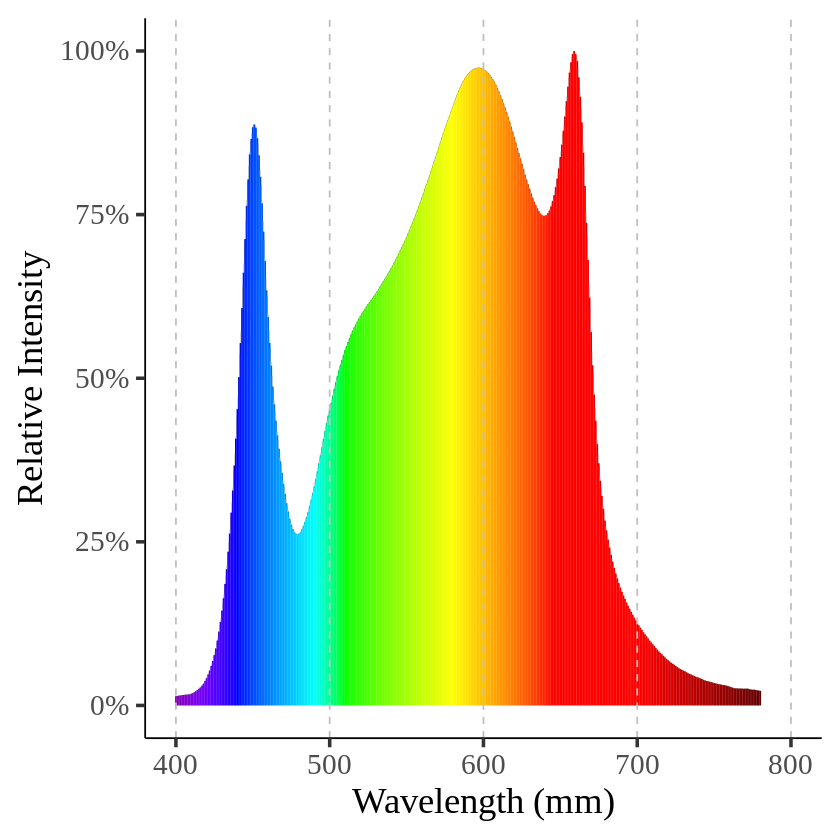

In [5]:
library(ggplot2)
ggplot(df, aes(x=spectrum, y=relative_intensity)) +
  geom_segment(aes(xend=spectrum, yend=0, colour= wavelength(spectrum)),
               linewidth=0.5) +
  geom_line(size=0.05) +
  scale_colour_identity() +
  scale_x_continuous(breaks=seq(400,800,100), limits=c(400,800))+
  scale_y_continuous(breaks=seq(0,1,0.25), limits=c(0,1),
                     labels=scales::percent)+
  geom_vline(xintercept=400, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=500, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=600, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=700, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=800, linetype= "dashed", color="grey75") +
  labs(x="Wavelength (mm)", y="Relative Intensity") +
  theme_classic(base_size=22, base_family="serif")+
  theme(axis.line=element_line(linewidth=0.5, colour="black"))

Warning message:
“Removed 20 rows containing missing values (`geom_segment()`).”
Warning message:
“Removed 20 rows containing missing values (`geom_line()`).”


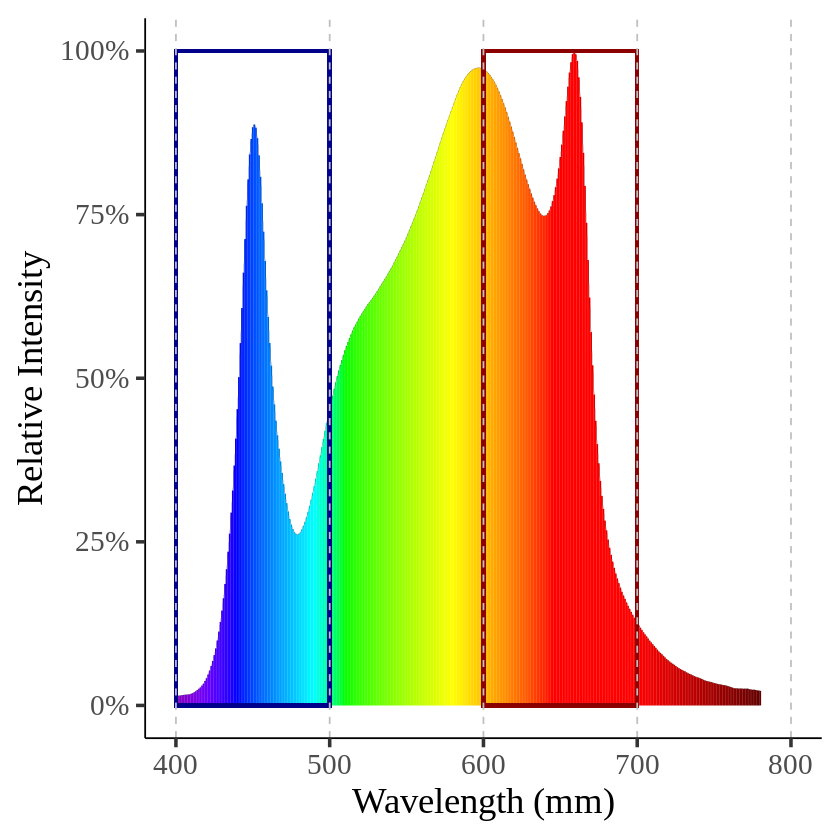

In [6]:
library(ggplot2)
ggplot(df, aes(x=spectrum, y=relative_intensity)) +
  geom_segment(aes(xend=spectrum, yend=0, colour= wavelength(spectrum)),
               linewidth=0.5) +
  geom_line(size=0.05) +
  scale_colour_identity() +

  geom_rect(aes(xmin=600, xmax=700, ymin=0, ymax=1),
            fill=NA, color="darkred", linetype="solid", size=1) +
  geom_rect(aes(xmin=400, xmax=500, ymin=0, ymax=1),
            fill=NA, color="darkblue", linetype="solid", size=1) +

  scale_x_continuous(breaks=seq(400,800,100), limits=c(400,800))+
  scale_y_continuous(breaks=seq(0,1,0.25), limits=c(0,1),
                     labels=scales::percent)+
  geom_vline(xintercept=400, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=500, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=600, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=700, linetype= "dashed", color="grey75") +
  geom_vline(xintercept=800, linetype= "dashed", color="grey75") +
  labs(x="Wavelength (mm)", y="Relative Intensity") +
  theme_classic(base_size=22, base_family="serif")+
  theme(axis.line=element_line(linewidth=0.5, colour="black"))